In [1]:
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

from fremontbridge.data import get_data

In [2]:
%matplotlib inline

data = get_data()
data.head()
#data.resample('W').sum().plot()

#ax = data.resample('D').sum().rolling(365).sum().plot();
#ax.set_ylim(0, None);

,West,East,Total
Date,,,
2015-02-24 02:00:00,3.0,3.0,6.0
2019-01-01 00:00:00,0.0,9.0,9.0
2019-01-01 01:00:00,2.0,22.0,24.0
2016-02-15 00:00:00,3.0,3.0,6.0
2019-01-01 02:00:00,1.0,11.0,12.0


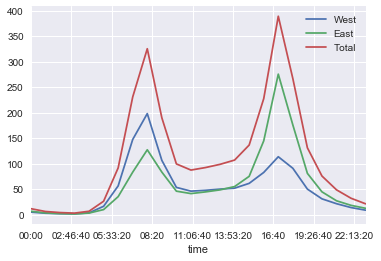

In [3]:
data.groupby(data.index.time).mean().plot()

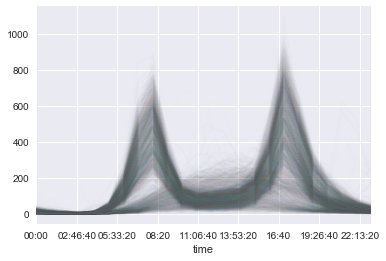

In [4]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]
pivoted.plot(legend=False, alpha =0.01)